In [3]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Nov 19, 2018",5620.78,5620.78,4842.91,4871.49,7039560000,84688539692
1,"Nov 18, 2018",5559.74,5653.61,5559.74,5623.54,4159680000,97753714643
2,"Nov 17, 2018",5578.58,5578.58,5519.56,5554.33,4303150000,96542098114
3,"Nov 16, 2018",5645.32,5657.02,5498.94,5575.55,5279320000,96900828780
4,"Nov 15, 2018",5736.15,5774.82,5358.38,5648.03,7032140000,98151606541


In [5]:
df=df.assign(Date=pd.to_datetime(df['Date']))
df.loc[df['Volume']=="-",'Volume']=0
df['Volume'] = df['Volume'].astype('int64')
df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-11-19,5620.78,5620.78,4842.91,4871.49,7039560000,84688539692
1,2018-11-18,5559.74,5653.61,5559.74,5623.54,4159680000,97753714643
2,2018-11-17,5578.58,5578.58,5519.56,5554.33,4303150000,96542098114
3,2018-11-16,5645.32,5657.02,5498.94,5575.55,5279320000,96900828780
4,2018-11-15,5736.15,5774.82,5358.38,5648.03,7032140000,98151606541


In [6]:
df.describe()

,Open*,High,Low,Close**,Volume,Market Cap
count,2032.000000,2032.000000,2032.000000,2032.000000,2.032000e+03,2.032000e+03
mean,2275.835271,2344.402495,2198.757431,2277.975723,1.426889e+09,3.768152e+10
std,3444.279070,3569.786777,3291.315003,3444.197673,3.030779e+09,5.862791e+10
min,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.784112e+08
25%,319.985000,327.987500,312.287500,320.185000,1.865728e+07,4.376588e+09
50%,596.050000,605.295000,585.930000,596.210000,5.755740e+07,8.118442e+09
75%,2562.640000,2642.142500,2493.950000,2572.202500,1.170222e+09,4.226390e+10
max,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.265025e+11


F:\Anaconda2\envs\tensorflow_demo\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


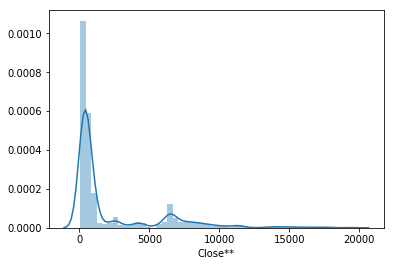

In [7]:
sns.distplot(df['Close**'])

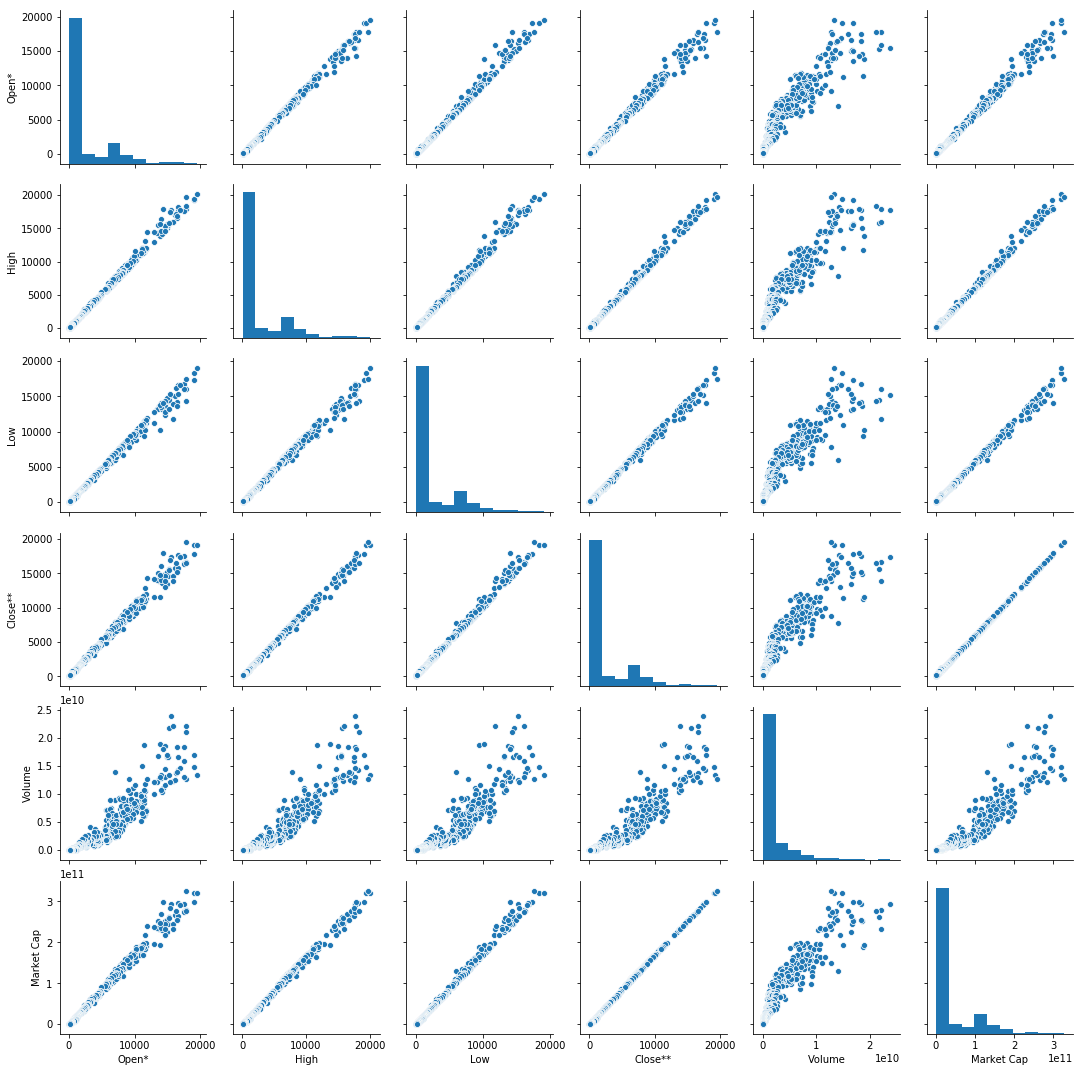

In [8]:
sns.pairplot(df)

Text(0, 0.5, 'Close Price')

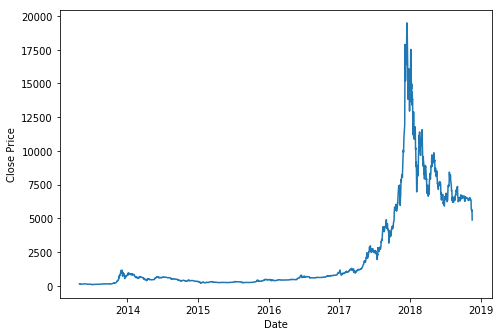

In [9]:
fig=plt.figure()
aax=fig.add_axes([0,0,1,1])
aax.plot(df['Date'],df['Close**'])
aax.set_xlabel('Date')
aax.set_ylabel('Close Price')

Text(0, 0.5, 'Volume')

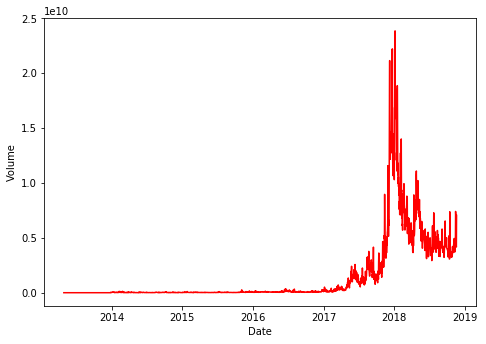

In [10]:
fig=plt.figure()
aax=fig.add_axes([0,0,1,1])
aax.plot(df['Date'],df['Volume'],color='red')
aax.set_xlabel('Date')
aax.set_ylabel('Volume')

In [11]:
btc = { 'Day_dif': lambda df1: (df1['Close**']-df1['Open*'])/df1['Open*']}
df = df.assign(**btc)
df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap,Day_dif
0,2018-11-19,5620.78,5620.78,4842.91,4871.49,7039560000,84688539692,-0.133307
1,2018-11-18,5559.74,5653.61,5559.74,5623.54,4159680000,97753714643,0.011475
2,2018-11-17,5578.58,5578.58,5519.56,5554.33,4303150000,96542098114,-0.004347
3,2018-11-16,5645.32,5657.02,5498.94,5575.55,5279320000,96900828780,-0.012359
4,2018-11-15,5736.15,5774.82,5358.38,5648.03,7032140000,98151606541,-0.015362


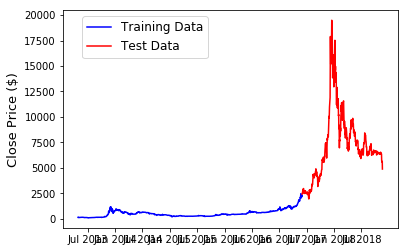

In [12]:
s_date='2017-06-01'
s2_date='2014-06-01'
fig,(ax1)=plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(df[df['Date'] < s_date]['Date'].astype(datetime.datetime),
        df[df['Date'] < s_date]['Close**'], 
         color='blue', label='Training Data')
ax1.plot(df[df['Date'] >= s_date]['Date'].astype(datetime.datetime),
         df[df['Date'] >= s_date]['Close**'], 
         color='red', label='Test Data')
ax1.set_ylabel('Close Price ($)',fontsize=13)
ax1.legend(bbox_to_anchor=(0.04, 1), loc=2, borderaxespad=0.5, prop={'size': 12})
plt.show()

In [13]:
for i in df: 
    kwargs = { 'Close_off_high': lambda x: 2*(x['High']- x['Close**'])/(x['High']-x['Low'])-1,
            'Volatility': lambda x: (x['High']- x['Low'])/(x['Open*'])}
    df = df.assign(**kwargs)

df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap,Day_dif,Close_off_high,Volatility
0,2018-11-19,5620.78,5620.78,4842.91,4871.49,7039560000,84688539692,-0.133307,0.926517,0.138392
1,2018-11-18,5559.74,5653.61,5559.74,5623.54,4159680000,97753714643,0.011475,-0.359327,0.016884
2,2018-11-17,5578.58,5578.58,5519.56,5554.33,4303150000,96542098114,-0.004347,-0.178245,0.010580
3,2018-11-16,5645.32,5657.02,5498.94,5575.55,5279320000,96900828780,-0.012359,0.030744,0.028002
4,2018-11-15,5736.15,5774.82,5358.38,5648.03,7032140000,98151606541,-0.015362,-0.391077,0.072599


In [14]:
training_set, test_set = df[(df['Date']<s_date) & (df['Date']>s2_date) ], df[df['Date']>=s_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [15]:
window_len =10

In [17]:
LSTM_training_ip = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in ['Close**','Volume']:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_ip.append(temp_set)
LSTM_training_outputs = (training_set['Close**'][window_len:].values/training_set['Close**'][:-window_len].values)-1


In [16]:
LSTM_test_ip = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in ['Close**','Volume']:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] -1 
    LSTM_test_ip.append(temp_set)
LSTM_test_outputs = (test_set['Close**'][window_len:].values/test_set['Close**'][:-window_len].values)-1


In [18]:
LSTM_training_ip[0]

,Open*,High,Low,Close**,Volume,Market Cap,Day_dif,Close_off_high,Volatility
537,2187.19,2311.08,2145.57,0.000000,0.000000,37414813240,0.045364,-0.701891,0.075672
538,2255.36,2301.96,2124.57,-0.048521,-0.065289,35594903085,-0.035422,0.426123,0.078653
539,2159.43,2307.05,2107.17,-0.013471,-0.356159,36901102917,0.044540,-0.485291,0.092561
540,2054.08,2267.34,2054.08,-0.057124,-0.257433,35264171110,0.049521,0.046047,0.103823
541,2196.27,2260.20,1855.83,-0.108266,0.100755,33347170525,-0.071667,0.094691,0.184117
542,2320.89,2573.79,2071.99,-0.036734,0.141537,36017660894,-0.051045,0.480151,0.216210
543,2446.24,2763.71,2285.30,0.008122,0.557906,37690456715,-0.057746,0.917727,0.195570
544,2321.37,2523.72,2321.37,0.068767,0.116874,39952841999,0.052671,-0.208500,0.087168
545,2191.56,2320.82,2178.50,0.014875,-0.107507,37933704066,0.058798,-0.994379,0.064940
546,2043.19,2303.90,2017.87,-0.049427,0.257239,35525744380,0.063729,-0.087508,0.139992


In [19]:
LSTM_training_ip = [np.array(LSTM_training_ip) for LSTM_training_ip in LSTM_training_ip]
LSTM_training_ip = np.array(LSTM_training_ip)

LSTM_test_ip = [np.array(LSTM_test_ip) for LSTM_test_ip in LSTM_test_ip]
LSTM_test_ip = np.array(LSTM_test_ip)

In [21]:
from keras import metrics
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="tanh",
                dropout=0.25, loss="mean_squared_error", optimizer="sgd"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer,metrics =["mae"])
    return model

Using TensorFlow backend.


In [22]:
np.random.seed(202)
bit_model = build_model(LSTM_training_ip, output_size=1, neurons = 20)
LSTM_training_outputs = (training_set['Close**'][window_len:].values/training_set['Close**'][:-window_len].values)-1
bit_history = bit_model.fit(LSTM_training_ip, LSTM_training_outputs, 
                            epochs=10, batch_size=1, verbose=2, shuffle=True)


Epoch 1/10
 - 15s - loss: 0.0316 - mean_absolute_error: 0.1230
Epoch 2/10
 - 12s - loss: 0.0107 - mean_absolute_error: 0.0756
Epoch 3/10
 - 12s - loss: 0.0105 - mean_absolute_error: 0.0757
Epoch 4/10
 - 13s - loss: 0.0104 - mean_absolute_error: 0.0746
Epoch 5/10
 - 12s - loss: 0.0104 - mean_absolute_error: 0.0749
Epoch 6/10
 - 12s - loss: 0.0105 - mean_absolute_error: 0.0745
Epoch 7/10
 - 12s - loss: 0.0105 - mean_absolute_error: 0.0754
Epoch 8/10
 - 12s - loss: 0.0104 - mean_absolute_error: 0.0751
Epoch 9/10
 - 12s - loss: 0.0105 - mean_absolute_error: 0.0750
Epoch 10/10
 - 12s - loss: 0.0105 - mean_absolute_error: 0.0756


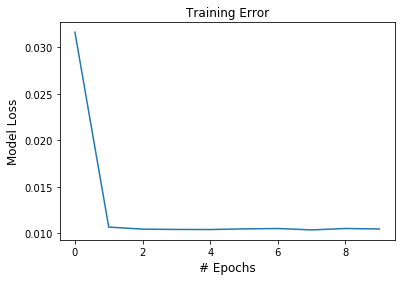

In [23]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(bit_history.epoch, bit_history.history['loss'])
ax1.set_title('Training Error')

if bit_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

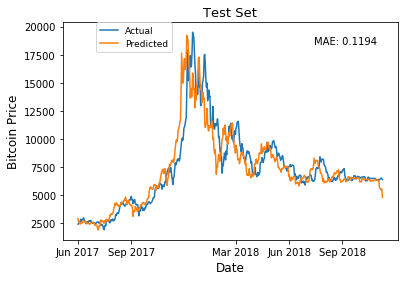

In [24]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [3,6,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [3,6,9]])
ax1.plot(df[df['Date']>= s_date]['Date'][10:].astype(datetime.datetime),
         test_set['Close**'][window_len:], label='Actual')
ax1.plot(df[df['Date']>= s_date]['Date'][10:].astype(datetime.datetime),
         ((np.transpose(bit_model.predict(LSTM_test_ip))+1) * test_set['Close**'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bit_model.predict(LSTM_test_ip))+1)-\
            (test_set['Close**'].values[window_len:])/(test_set['Close**'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set',fontsize=13)
ax1.set_ylabel('Bitcoin Price',fontsize=12)
ax1.set_xlabel('Date',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 9})
plt.show()